<a href="https://colab.research.google.com/github/UmutErayAltay/YapayZekayaGiris/blob/main/Shap_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 24.6 MB/s 


In [ ]:
# Pandas
import pandas as pd

# Sklearn içindeki Eğitim-Test ve doğruluk kütüphanelerimizi ekliyoruz.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Tree based algorithms
from sklearn.ensemble import RandomForestClassifier

# XAI
import shap

In [ ]:
names = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']
features = names[:-1]
df = pd.read_csv("veriler/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
count_class = df.groupby("Species").size()
count_class


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [ ]:
X = df.drop(["Species","Id"], axis=1)
Y = df["Species"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

Random Forest Classifier, bir makine öğrenimi yöntemidir ve birçok karar ağacı yönteminden oluşan bir model oluşturarak bu modele veri kümesini uygular. Bu model, verilen veri kümesindeki özelliklerin sınıflandırma tahminlerinde ne kadar etkili olduğunu değerlendirir ve tahminleri yapar. Random Forest Classifier yöntemi, tek bir karar ağacı yöntemine göre daha iyi performans sağlar çünkü birçok farklı karar ağacı yöntemi bir arada kullanılır ve bu sayede tahminler daha doğru hale gelir. Bu yöntem ayrıca overfitting (aşırı uyumluluk) problemine karşı da dayanıklıdır çünkü farklı karar ağaçları kullanılarak tahminler yapılır ve bu sayede model daha genel bir görüşe sahip olur.

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100).fit(x_train, y_train) 
#Random Forest algoritmamızı 100 adet karar ağacı kullanarak eğitiyoruz.

"n_estimators" parametresi, Random Forest Classifier yönteminde kullanılan karar ağaçlarının sayısını belirtir. Bu parametre, modelin tahminlerini yaparken kullanılacak olan karar ağaçlarının sayısını belirtir. Örneğin, "n_estimators=100" ifadesi ile Random Forest Classifier yönteminde 100 adet karar ağacı kullanılacağı anlamına gelir. Bu parametre, modelin tahminlerinin doğruluğunu etkiler çünkü daha fazla karar ağacı kullanılırsa tahminler daha doğru hale gelebilir ancak bu aynı zamanda modelin hesaplama gücünü ve çalışma hızını da etkiler. Bu nedenle, "n_estimators" parametresini doğru bir şekilde ayarlamak önemlidir.

Algoritmamızın doğruluğunu ölçüyoruz.

In [ ]:
y_predicted = rf_model.predict(x_test)
accuracy = accuracy_score(y_test, y_predicted)
print("Precisión: ",  accuracy*100, "%")

Precisión:  98.0 %


Random forest modelini kullanarak bir Shap explainer nesnesi oluşturur.Daha sonra, shap. TreeExplainer fonksiyonu kullanılarak bir Shap explainer nesnesi oluşturulur. Bu nesne, Random Forest modelinin nasıl karar verdiğini anlamak için kullanılabilir.

In [ ]:
explainer = shap.TreeExplainer(rf_model)

Test veri setindeki ilk satırı ve bu satırdaki beklenen sınıfı ekrana yazdırılır.                                   
Aynı zamanda, seçilen satırdaki beklenen sınıf da y_test veri setinden alınarak yazdırılır.

In [ ]:
observation = x_test.iloc[0]
print(x_test.iloc[0])
print("Beklenen Değer: ", y_test.iloc[0])

SepalLengthCm    5.7
SepalWidthCm     4.4
PetalLengthCm    1.5
PetalWidthCm     0.4
Name: 15, dtype: float64
Beklenen Değer:  Iris-setosa


In [ ]:
#shap.initjs()

SHAP (SHapley Additive exPlanation) değerleri, bir veri noktasının tahmini etkileyen özelliklerin ağırlık değerleridir. 

shap_values() fonksiyonu, verilen veri noktası için SHAP değerlerini hesaplar. SHAP (SHapley Additive exPlanation) değerleri, verilen veri noktasının tahmini etkileyen özelliklerin ağırlık değerlerini gösterir. Bu ağırlık değerleri, veri noktasının tahminine katkıda bulunan özelliklerin etkisini gösterir ve bu etkiyi grafik üzerinde gösterir.

force_plot() fonksiyonu ise, verilen veri noktası için hesaplanan SHAP değerlerini grafik üzerinde gösterir. Bu grafikte, özelliklerin ağırlık değerleri sıfır çizgisi üzerinde pozitif, altında negatif olarak gösterilir. Bu ağırlık değerlerinin yüksekliği, özelliklerin tahmine etkisinin ne kadar büyük olduğunu gösterir. Özelliklerin değerlerinin ortalama değerden ne kadar uzak olduğu ise, özelliklerin etkisini gösterir.

Böylece, shap_values() ve force_plot() fonksiyonları kullanılarak, verilen veri noktası için modelin tahmin yapma sürecini anlamaya yardımcı olan SHAP değerleri hesaplanır ve bu değerler grafik üzerinde gösterilir.

In [ ]:
shap_values = explainer.shap_values(observation)
shap.force_plot(explainer.expected_value[0], shap_values[0], features=observation)


Shap explainer kullanarak bir eğitim veri setindeki tüm örnekler için modelin nasıl karar verdiğini açıklar.

In [ ]:
all_shap_values = explainer.shap_values(x_train)
shap.force_plot(explainer.expected_value[0], all_shap_values[0], features=x_train)

### Grafikte görüldüğü gibi, 'PetalWidthCm' ve 'PetalLengthCm' özellikleri modelin tahmini en çok etkileyen özelliklerdir. Bu özelliklerin değerlerinin ortalamadan daha yüksek olması, tahmine pozitif etki yapmaktadır. Ayrıca, 'SepalLengthCm' özelliğinin değerinin ortalamadan daha düşük olması ise, tahmine negatif etki yapmaktadır. Bu şekilde, modelin tahmin yapma sürecini anlamaya yardımcı olan SHAP değerleri gösterilerek, modelin veri seti üzerindeki etkisi anlaşılır.

Shap explainer kullanarak bir eğitim veri setindeki tüm örnekler için modelin nasıl karar verdiğini açıklar. 

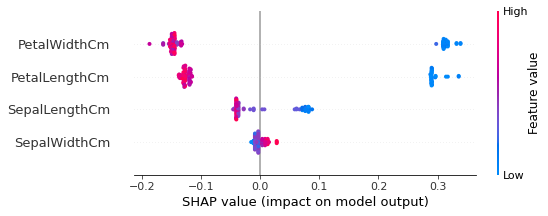

In [ ]:
shap.summary_plot(all_shap_values[0], features=x_train, feature_names=features)


Yukarıdaki kodda, shap.summary_plot() fonksiyonu ile verilen veri seti için tüm veri noktalarının SHAP değerleri üzerinden bir özet grafik oluşturulmuştur. Bu grafikte, özellikler sırasıyla yatay eksende gösterilmiştir ve her bir özellik için SHAP değerleri dikey eksende gösterilmiştir.

Bu grafikte, özelliklerin SHAP değerleri sıfır çizgisi üzerinde pozitif, altında negatif olarak gösterilir. Bu ağırlık değerlerinin yüksekliği, özelliklerin tahmine etkisinin ne kadar büyük olduğunu gösterir. Özelliklerin değerlerinin ortalama değerden ne kadar uzak olduğu ise, özelliklerin etkisini gösterir.

Böylece, shap.summary_plot() fonksiyonu kullanılarak, verilen veri seti için modelin tahmin yapma sürecini anlamaya yardımcı olan SHAP değerleri üzerinden özet bir grafik oluşturulur ve bu sayede modelin veri seti üzerindeki etkisi anlaşılır.

#### Bu grafikte, 'PetalWidthCm' ve 'PetalLengthCm' özelliklerinin SHAP değerlerinin diğer özelliklerden daha yüksek olduğu görülmektedir. Bu da bu özelliklerin modelin tahmini en çok etkileyen özellikler olduğunu gösterir.
